# Exploratory Data Analysis (EDA) of Civil Service Dataset - Civil Service

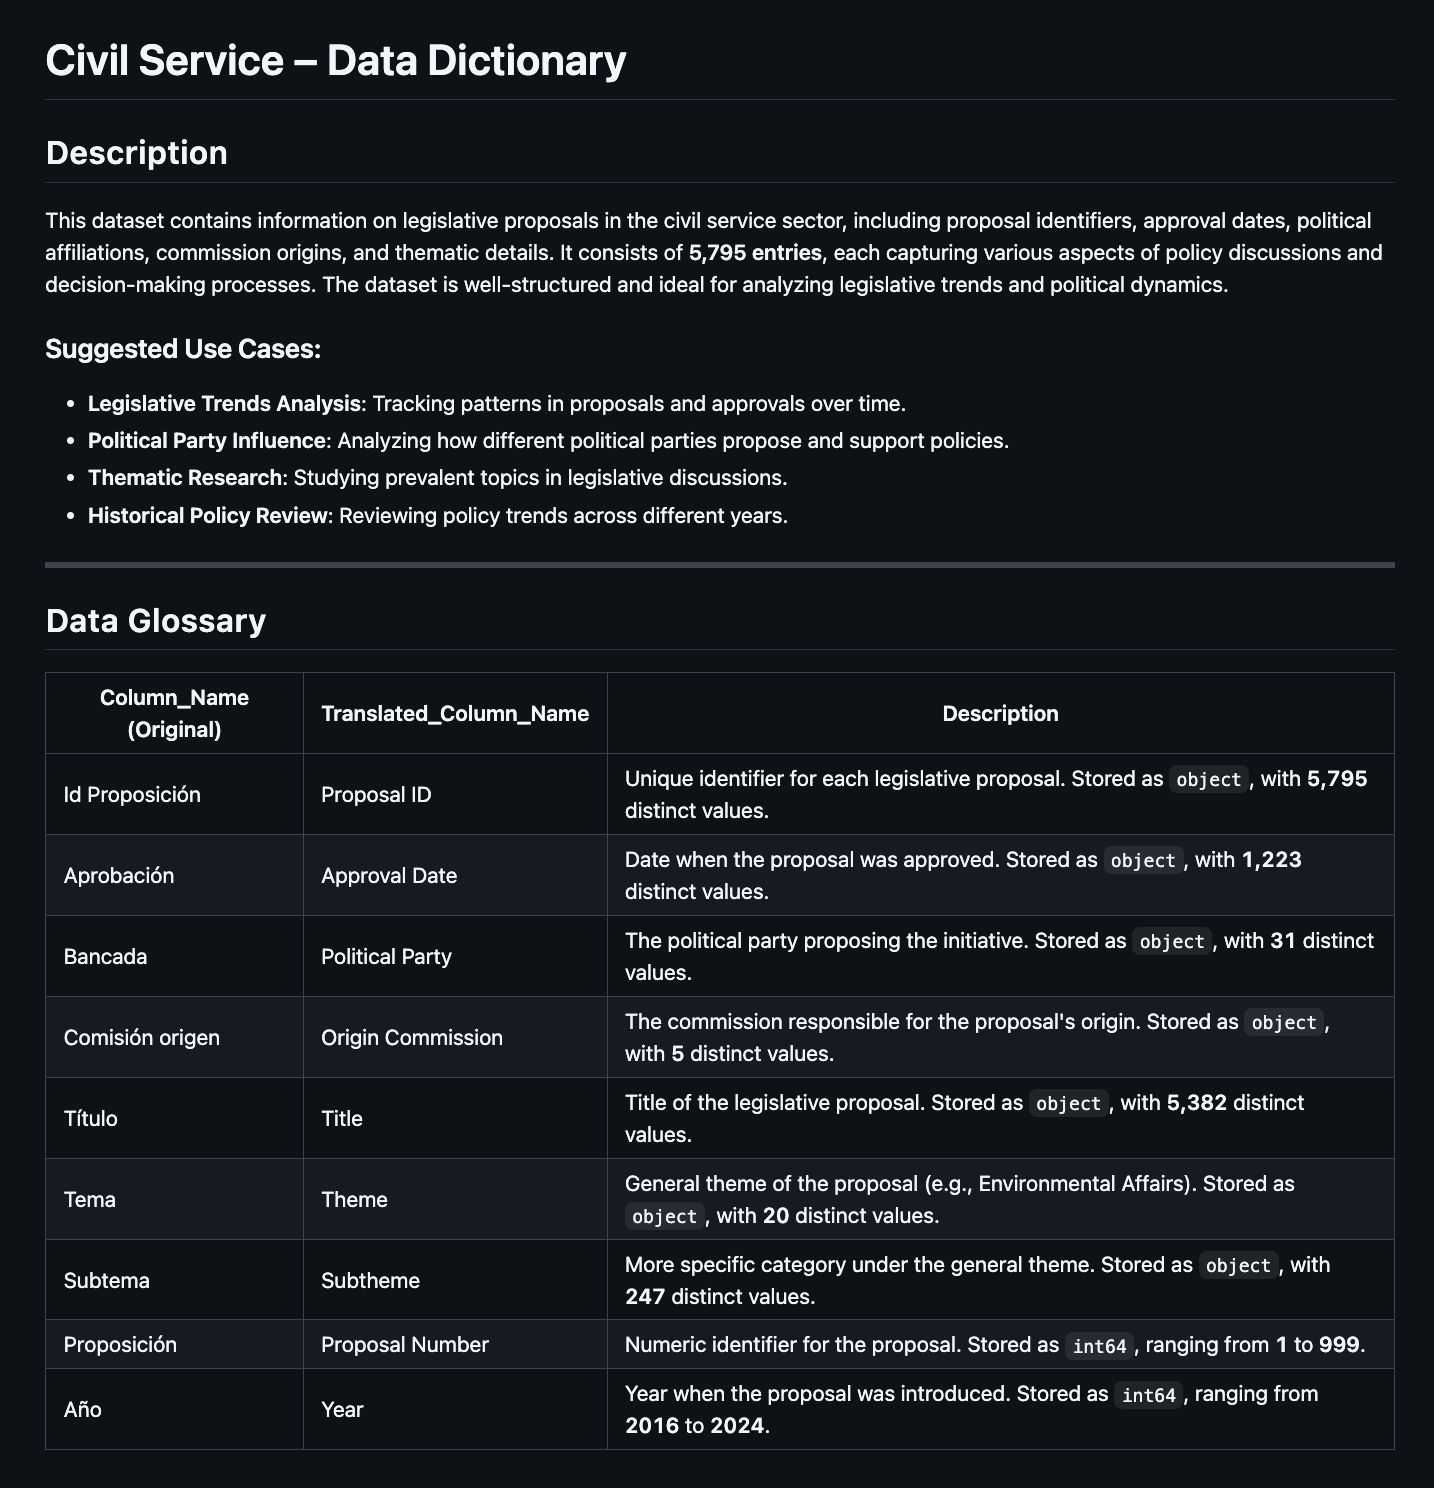

In [1]:
# Import required libraries
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()  # Loads from .env by default

## Define base path (adjust if notebook is in different location)
BASE_PATH = os.getenv('BASE_PATH')

# Verify base path exists
if not BASE_PATH or not os.path.exists(BASE_PATH):
    raise ValueError(f"Invalid BASE_PATH: {BASE_PATH}. Check your .env file and directory structure")

In [2]:
raw = pd.read_parquet(os.path.join(BASE_PATH, 'data/1_Bronze/civil_service.parquet'))

In [3]:
df = raw.copy()

In [4]:
df.head()

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
0,dic-16,8/02/2016,Partido Conservador Colombiano,Plan,RIO BOGOTÁ,Asuntos Ambientales,AMB - Río Bogotá,12,2016
1,nov-16,8/02/2016,Partido Libres,Plan,PLAN DE ORDENMIENTO TERRITORIAL,Ordenamiento Territorial,POT - POT,11,2016
2,oct-16,8/02/2016,Partido de la U,Plan,IMPLEMENTACIÓN DEL ACUERDO 516/2012 - ZONAS AM...,Seguridad,SEG - Puntos Críticos,10,2016
3,sep-16,8/02/2016,Centro Democrático,Plan,EMPRESA ACUEDUCTO,Empresas Públicas,EPU - Empresa de Acueducto,9,2016
4,ago-16,8/02/2016,Partido Alianza Verde,Plan,RIO BOGOTÁ,Asuntos Ambientales,AMB - Río Bogotá,8,2016


In [5]:
# list all the unique valies of Tema column
df['Tema'].unique()

array(['Asuntos Ambientales', 'Ordenamiento Territorial', 'Seguridad',
       'Empresas Públicas', 'Movilidad', 'Salud', 'Asuntos Educativos',
       'Hacienda Pública', 'Infraestructura', 'Esquema de Aseo',
       'Asuntos Políticos', 'Cultura', 'Espacio Público',
       'Asuntos de Especial Protección', 'Desarrollo Económico',
       'Contratación', 'Alcaldías Locales', 'Gestión Pública',
       'Inspección, Vigilancia y Control', 'Mujer', None], dtype=object)

## Security

In [10]:
target_accounts = [
    "Seguridad"
]

# Filter the DataFrame using .isin()
security = df[df['Tema'].isin(target_accounts)]

In [11]:
security

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
2,oct-16,8/02/2016,Partido de la U,Plan,IMPLEMENTACIÓN DEL ACUERDO 516/2012 - ZONAS AM...,Seguridad,SEG - Puntos Críticos,10,2016
12,20-2016,9/02/2016,Centro Democrático,Gobierno,"REGULACIÓN DEL PIE DE FUERZA DE LA POLICÍA, UT...",Seguridad,SEG - Policía,20,2016
16,16-2016,9/02/2016,Partido Alianza Verde,Gobierno,NUEVA ESTRATEGIA DE SEGURIDAD NE BOGOTÁ D.C.,Seguridad,SEG - Seguridad,16,2016
17,15-2016,9/02/2016,Polo Democrático Alternativo,Gobierno,"INSEGURIDAD EN BOGOTÁ, ¿PERCEPCIÓN O VICTIMIZA...",Seguridad,SEG - Seguridad,15,2016
18,14-2016,9/02/2016,Partido Opción Ciudadana,Gobierno,RUMBA EXTENDIDA,Seguridad,SEG - Seguridad,14,2016
...,...,...,...,...,...,...,...,...,...
5733,452-2024,3/03/2024,Centro Democrático,Gobierno,Seguridad en entornos escolares,Seguridad,SEG - Seguridad,452,2024
5737,448-2024,3/03/2024,Centro Democrático,Gobierno,Situación actual de las autoridades administra...,Seguridad,SEG - Policía,448,2024
5760,471-2024,8/03/2024,Alianza Verde,Plenaria,Cifras de sicariato en Bogotá,Seguridad,SEG - Delitos,471,2024
5769,488-2024,11/03/2024,Colombia Justa Libres,Plenaria,Delincuencia juvenil en Bogotá,Seguridad,SEG - Delincuencia Juvenil,488,2024


In [12]:
# Show the rows that have TRANSPORTE and TRANSMILENIO in the Título column of the filtered DataFrame
security[security['Título'].str.contains('TRANSPORTE|TRANSMILENIO')]

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
118,124-2016,27/02/2016,Partido Alianza Verde,Gobierno,SEGURIDAD TRANSMILENIO,Seguridad,SEG - Seguridad,124,2016
1190,450-2017,14/09/2017,Partido Libres,Gobierno,"SEGURIDAD - HURTOS, HOMICIDIOS, LESIONES PERSO...",Seguridad,SEG - Microtráfico,450,2017
1393,49-2018,28/01/2018,Partido Alianza Verde,Gobierno,INSEGURIDAD EN TRANSMILENIO,Seguridad,SEG - Seguridad,49,2018
1424,100-2018,15/02/2018,Partido Libres,Plenaria,SEGURIDAD EN EL SISTEMA DE TRANSPORTE PÚBLICO ...,Seguridad,SEG - Seguridad,100,2018
1469,134-2018,27/02/2018,Partido Libres,Gobierno,SEGURIDAD EN EL TRANSPORTE PÚBLICO Y PRIVADO E...,Seguridad,SEG - Seguridad,134,2018
2475,27-2020,13/01/2020,Bogotá para la Gente,Plenaria,PLAN PARA ENFRENTAR LA INSEGURIDAD EN BOGOTA E...,Seguridad,SEG - Delitos,27,2020
2517,76-2020,19/01/2020,Centro Democrático,Plenaria,SEGURIDAD EN TRANSMILENIO\n,Seguridad,SEG - Seguridad,76,2020
2684,208-2020,31/01/2020,Partido Liberal Colombiano,Gobierno,"TASA DE HURTO EN LAS LOCALIDADES EN BOGOTÁ, EN...",Seguridad,SEG - Delitos,208,2020
2685,207-2020,31/01/2020,Partido Liberal Colombiano,Gobierno,HURTO A PERSONAS EN EL SISTEMA DE TRANSMILENIO,Seguridad,SEG - Delitos,207,2020
2835,360-2020,12/03/2020,Bogotá para la Gente,Plan,SEGURIDAD EN EL SISTEMA DE TRANSPORTE PUBLICO ...,Seguridad,SEG - Seguridad,360,2020


## Mobility

In [16]:
target_accounts = [
    "Movilidad"
]

# Filter the DataFrame using .isin()
mobility = df[df['Tema'].isin(target_accounts)]

In [17]:
mobility

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
5,jul-16,8/02/2016,Alianza Social Independiente,Plan,BICICLETA,Movilidad,MOV - Bicicletas,7,2016
20,28-2016,10/02/2016,Movimiento Mira,Hacienda,TARIFAS SITP,Movilidad,MOV - SITP,28,2016
23,25-2016,10/02/2016,Partido Progresistas,Hacienda,METRO,Movilidad,MOV - Metro,25,2016
26,22-2016,10/02/2016,Alianza Social Independiente,Hacienda,FINANZAS TRANSMILENIO,Movilidad,MOV - Transmilenio,22,2016
30,40-2016,11/02/2016,Partido Opción Ciudadana,Plan,DIA SIN CARRO,Movilidad,MOV - Movilidad Sostenible,40,2016
...,...,...,...,...,...,...,...,...,...
5774,490-2024,15/03/2024,Centro Democrático,Plan,Estado actual del IDU,Movilidad,MOV - Movilidad,490,2024
5775,489-2024,15/03/2024,Cambio Radical,Plan,Estado de la malla vial local intermedia en Bo...,Movilidad,MOV - Seguridad Vial,489,2024
5776,497-2024,16/03/2024,Centro Democrático,Hacienda,Infracciones de tránsito y foto comparendos,Movilidad,MOV - Sanciones,497,2024
5778,495-2024,16/03/2024,Nuevo Liberalismo,Hacienda,Impacto financiero de los colados en Transmil...,Movilidad,MOV - Transmilenio,495,2024


In [28]:
# Show the rows that have FINANZAS and FINANCIERO in the Título column of the filtered DataFrame
mobility[mobility['Título'].str.contains('FINANZAS|FINANCIERO|FINANCIERA', na=False)]

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
26,22-2016,10/02/2016,Alianza Social Independiente,Hacienda,FINANZAS TRANSMILENIO,Movilidad,MOV - Transmilenio,22,2016
264,278-2016,7/04/2016,Centro Democrático,Hacienda,ANALISIS FINANCIERO EMPRESA TM,Movilidad,MOV - Transmilenio,278,2016
307,279-2016,18/04/2016,Centro Democrático,Hacienda,PROYECCIÓN FINANCIERA Y OPERACIONAL DEL METRO ...,Movilidad,MOV - Metro,279,2016
364,359-2016,5/06/2016,Partido Cambio Radical,Hacienda,IMPACTO FINANCIERO EN TRANSMILENIO S.A DERIVAD...,Movilidad,MOV - Transmilenio,359,2016
504,504-2016,23/08/2016,Partido Alianza Verde,Hacienda,ESTADO FINANCIERO DE LOS CONCESIONARIOS DEL SITP,Movilidad,MOV - SITP,504,2016
567,570-2016,3/10/2016,Partido Alianza Verde,Hacienda,"""SITUACIÓN FINANCIERA DE TRANSMILENIO""",Movilidad,MOV - Transmilenio,570,2016
1094,375-2017,27/07/2017,Partido Cambio Radical,Hacienda,ESQUEMA FINANCIERO PARA LA CONSTRUCCIÓN DE LAS...,Movilidad,MOV - Movilidad,375,2017
1232,503-2017,2/10/2017,Partido Libres,Plan,SITUACIÓN FINANCIERA DE LOS OPERADORES DEL SIS...,Movilidad,MOV - SITP,503,2017
1310,572-2017,16/11/2017,Movimiento Mira,Hacienda,SITUACIÓN FINANCIERA DEL TRANSPORTE PÚBLICO EN...,Movilidad,MOV - Transporte Público,572,2017
1442,105-2018,16/02/2018,Partido Alianza Verde,Hacienda,SITUACIÓN FINANCIERA DEL SITP,Movilidad,MOV - SITP,105,2018


## Political Affairs

In [23]:
target_accounts = [
    "Asuntos Políticos"
]

# Filter the DataFrame using .isin()
polticial_affairs = df[df['Tema'].isin(target_accounts)]

In [24]:
polticial_affairs

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
42,43-2016,12/02/2016,Polo Democrático Alternativo,Plan,OTROS,Asuntos Políticos,POL - Relaciones Políticas,43,2016
106,92-2016,23/02/2016,Polo Democrático Alternativo,Plenaria,SECRETARIO DE AMBIENTE,Asuntos Políticos,POL - Citaciones,92,2016
107,91-2016,23/02/2016,Partido Alianza Verde,Plenaria,OTROS,Asuntos Políticos,POL - Relaciones Políticas,91,2016
108,90-2016,23/02/2016,Partido Liberal Colombiano,Plenaria,EXTENSIÓN SESIONES ORDINARIAS,Asuntos Políticos,POL - Citaciones,90,2016
109,89-2016,23/02/2016,Partido Cambio Radical,Plenaria,EXTENSIÓN SESIONES ORDINARIAS,Asuntos Políticos,POL - Citaciones,89,2016
...,...,...,...,...,...,...,...,...,...
5697,409-2024,22/02/2024,Nuevo Liberalismo,Plenaria,prórroga primer periodo de sesiones ordinarias,Asuntos Políticos,POL - Relaciones Políticas,409,2024
5717,430-2024,1/03/2024,None,Plenaria,Proposición para la designación transitoria pe...,Asuntos Políticos,POL - Relaciones Políticas,430,2024
5719,446-2024,2/03/2024,Liberal Colombiano,Gobierno,Avances Región Metropolitana,Asuntos Políticos,POL - Acuerdos Distritales,446,2024
5729,436-2024,2/03/2024,Liberal Colombiano,Gobierno,Proposición aditiva a la proposición 154 del 2...,Asuntos Políticos,POL - Proyectos De Acuerdo,436,2024


In [30]:
# Show the rows that have TRANSPORTE and TRANSMILENIO in the Título column of the filtered DataFrame
polticial_affairs[polticial_affairs['Título'].str.contains('TRANSPORTE|TRANSMILENIO|VANDÁLICOS|VANDALISMO|VANDALISMA', na=False)]

,Id Proposición,Aprobación,Bancada,Comisión origen,Título,Tema,Subtema,Proposición,Año
819,94-2017,17/02/2017,Partido Opción Ciudadana,Gobierno,CONTROL DE LOS DESMANES Y ACTOS VANDÁLICOS EN ...,Asuntos Políticos,POL - Protesta Social,94,2017
846,116-2017,24/02/2017,Partido Conservador Colombiano,Hacienda,SUBSIDIOS DE TRANSPORTE ESTUDIANTES,Asuntos Políticos,POL - Subsidios,116,2017
1097,372-2017,27/07/2017,Partido Alianza Verde,Hacienda,SUNSIDIOS AL TRANSPORTE PÚBLICO,Asuntos Políticos,POL - Subsidios,372,2017
2127,30-2019,19/01/2019,Centro Democrático,Hacienda,LOS SUBSIDIOS AL TRANSPORTE PÚBLICO,Asuntos Políticos,POL - Subsidios,30,2019


# (END)